In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os

Part 5

Current Directory: /mnt/gs21/scratch/zhengyil/project-2-pi-by-mpi-team5-1/Part4


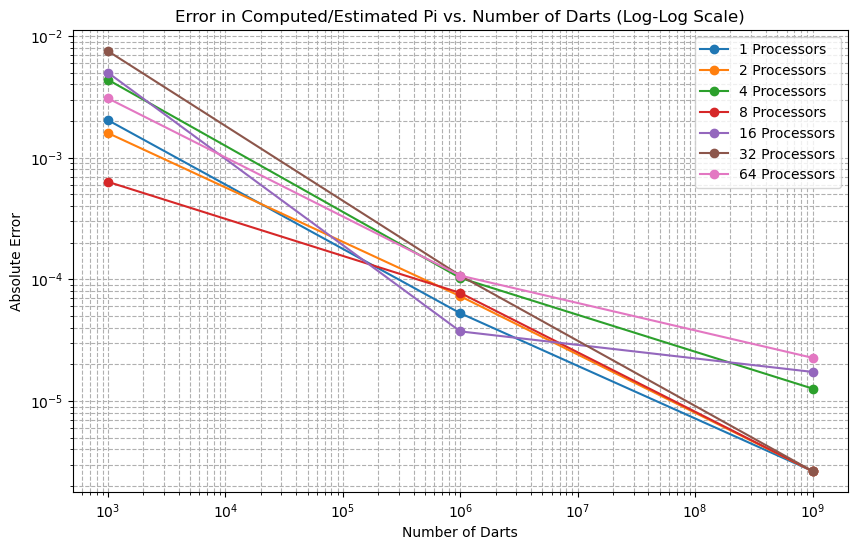

Convergence rates for 1 processors:
  Between 1000 and 1000000 darts: 0.5289
  Between 1000000 and 1000000000 darts: 0.4325
Convergence rates for 2 processors:
  Between 1000 and 1000000 darts: 0.4470
  Between 1000000 and 1000000000 darts: 0.4791
Convergence rates for 4 processors:
  Between 1000 and 1000000 darts: 0.5429
  Between 1000000 and 1000000000 darts: 0.3031
Convergence rates for 8 processors:
  Between 1000 and 1000000 darts: 0.3042
  Between 1000000 and 1000000000 darts: 0.4882
Convergence rates for 16 processors:
  Between 1000 and 1000000 darts: 0.7087
  Between 1000000 and 1000000000 darts: 0.1110
Convergence rates for 32 processors:
  Between 1000 and 1000000 darts: 0.6150
  Between 1000000 and 1000000000 darts: 0.5357
Convergence rates for 64 processors:
  Between 1000 and 1000000 darts: 0.4856
  Between 1000000 and 1000000000 darts: 0.2252


In [10]:
print("Current Directory:", os.getcwd())

# Getting true val of pi to compare
true_pi = np.pi
data = {}

# The correct file (for number 5 is p4_6.output)
with open('p4_6.output', 'r') as file:
    lines = file.readlines()
    
    processor_count = 0
    darts = 0  
    
    # Process each line in the output file
    for line in lines:
        if 'total processor count:' in line:
            processor_count = int(line.split(':')[1].strip())
            data[processor_count] = []
        elif line.strip().isdigit():  
            darts = int(line.strip())
        elif 'Estimated Pi' in line:
            estimated_pi = float(line.split('=')[1].strip())
            error = abs(estimated_pi - true_pi)
            # Storing darts and error in the dictionary for each processor count
            data[processor_count].append((darts, error))

################################### Plotting: ################################################
plt.figure(figsize=(10, 6))

for processor_count, values in data.items():
    # Sort values by number of darts for consistent plotting
    values.sort(key=lambda x: x[0])  
    darts = [v[0] for v in values]
    errors = [v[1] for v in values]
    
    plt.loglog(darts, errors, label=f'{processor_count} Processors', marker='o', linestyle='-')


plt.xlabel('Number of Darts')
plt.ylabel('Absolute Error')
plt.title('Error in Computed/Estimated Pi vs. Number of Darts (Log-Log Scale)')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.show()

################################### Convergence: ################################################
def calculate_convergence_rates(errors, darts):
    rates = []
    for i in range(1, len(errors)):
        e_n = errors[i-1]
        e_n_plus_1 = errors[i]
        h_n = 1 / darts[i-1]
        h_n_plus_1 = 1 / darts[i]
        
        rate = np.log(abs(e_n_plus_1 / e_n)) / np.log(abs(h_n_plus_1 / h_n))
        rates.append(rate)
    return rates

for processor_count, values in data.items():
    values.sort(key=lambda x: x[0])  # sorting
    darts = [v[0] for v in values]
    errors = [v[1] for v in values]
    
    # Calculateing convergence rates
    rates = calculate_convergence_rates(errors, darts)
    
    # Give the convergence rates:
    print(f"Convergence rates for {processor_count} processors:")
    for i, rate in enumerate(rates, start=1):
        print(f"  Between {darts[i-1]} and {darts[i]} darts: {rate:.4f}")

Part6

Current Directory: /mnt/gs21/scratch/zhengyil/project-2-pi-by-mpi-team5-1/Part4


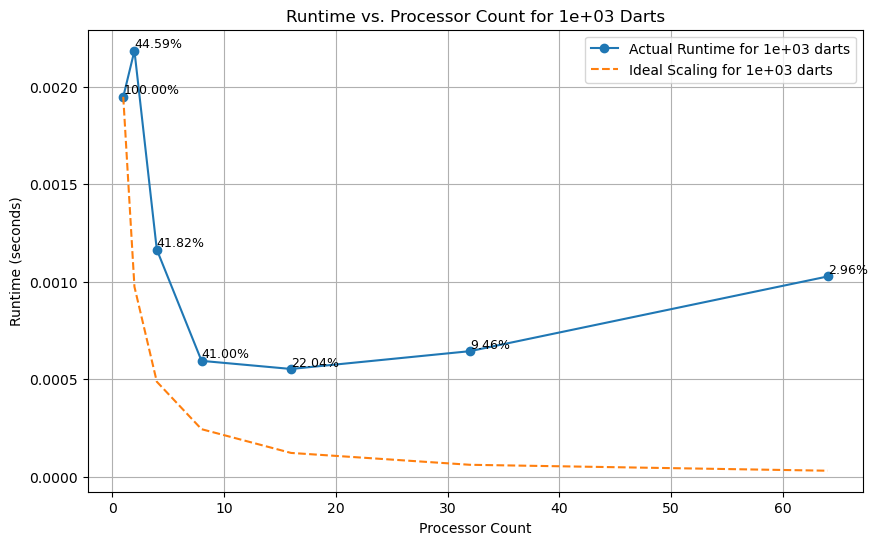

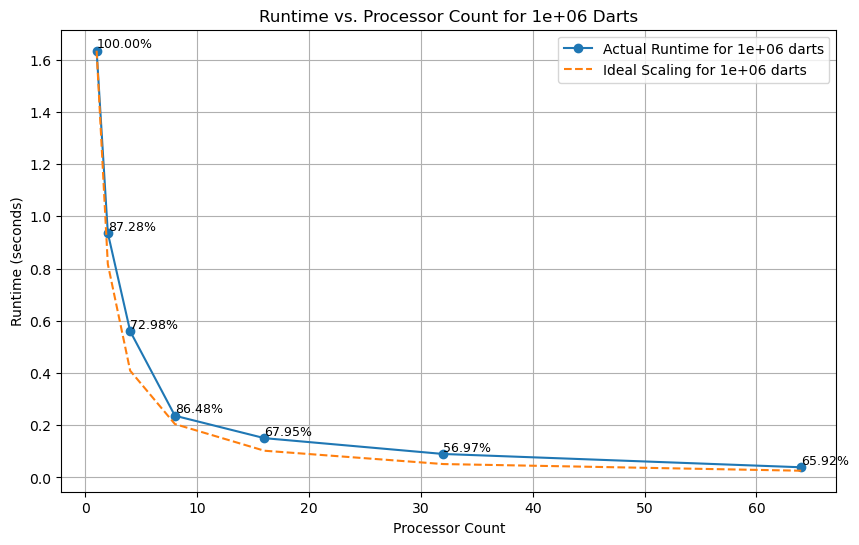

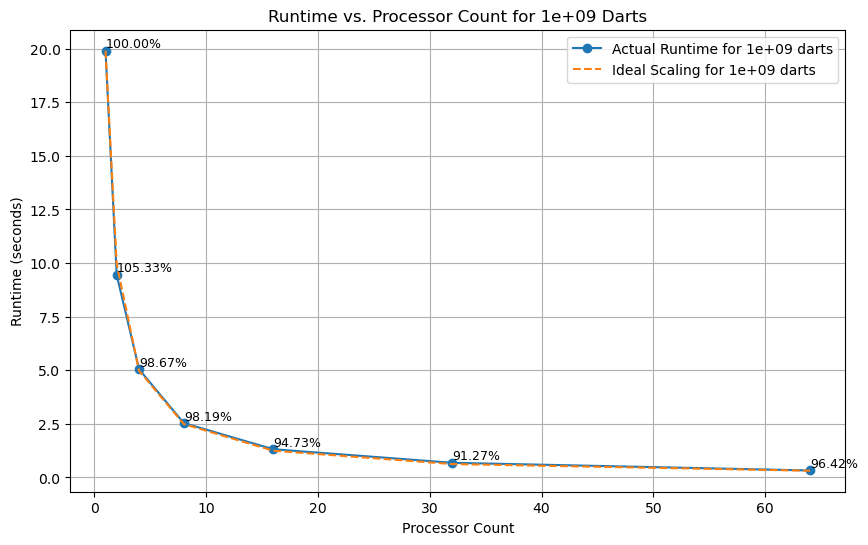

In [12]:
print("Current Directory:", os.getcwd())

# Making a few functions to generate the outputs

# Func to read the p4_6.output file
def read_output_file(filename):
    data = {}
    current_dart_count = None  
    with open(filename, 'r') as file:
        for line in file:
            if 'total processor count' in line:
                processor_count = int(line.split(': ')[1].strip())
            elif line.strip().isdigit():  
                current_dart_count = int(line.strip())
                if current_dart_count not in data:
                    data[current_dart_count] = {}
            elif 'Total runtime' in line:
                runtime = float(line.split('= ')[1].strip())
                if processor_count not in data[current_dart_count]:
                    data[current_dart_count][processor_count] = []
                data[current_dart_count][processor_count].append(runtime)
    return data

filename = 'p4_6.output'  
our_data = read_output_file(filename)

# Plot data and the ideal scaling line -- we're plotting the ideal scaling line based on notion of 'speed-up' being T1/Tn
# where T1 is the amount of time for 1 processor and n is the number of processors we're distributing the work to.
def plot_data_for_specific_dart_counts(data, specific_dart_counts):
    for dart_count in specific_dart_counts:
        proc_data = data[dart_count]
        proc_counts = sorted(proc_data.keys())
        runtimes = [np.mean(proc_data[proc]) for proc in proc_counts]  
        ideal_runtime = runtimes[0] / np.array(proc_counts)
        
        # Plotting runtime
        plt.figure(figsize=(10, 6))  
        plt.plot(proc_counts, runtimes, label=f'Actual Runtime for {dart_count:.0e} darts', marker='o')
        
        # Plottomg tje ideal scaling
        plt.plot(proc_counts, ideal_runtime, '--', label=f'Ideal Scaling for {dart_count:.0e} darts')
        
        # Calculating the parallel scaling eficiency and inserting its values -- efficiency = ideal runtime (T1/TN) / runtime == T1/(TN * runtime)
        efficiency = (ideal_runtime / np.array(runtimes)) * 100
        for i, eff in enumerate(efficiency):
            plt.text(proc_counts[i], runtimes[i], f"{eff:.2f}%", fontsize=9, verticalalignment='bottom')
        
        # Put it all in the plot
        plt.xlabel('Processor Count')
        plt.ylabel('Runtime (seconds)')
        plt.title(f'Runtime vs. Processor Count for {dart_count:.0e} Darts')
        plt.legend()
        plt.grid(True)
        plt.show()

# Apply the func
specific_dart_counts = [1E3, 1E6, 1E9]
plot_data_for_specific_dart_counts(our_data, specific_dart_counts)